In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
  name: str
  age: str
  skills: List[str]
  result: str

In [3]:
def greet_user(state: AgentState) -> AgentState:
  """ Greet User"""

  state['result'] = f"{state['name']}, welcome to the System. "

  return state

def users_age(state: AgentState) -> AgentState:
  """ tell user's age"""

  state['result'] += f"You are {state['age']} years old! "

  return state

def users_skills(state: AgentState) -> AgentState:
  """ Tell users skills"""

  state['result'] += f"Your skills are: {', '.join(state['skills'])}"

  return state

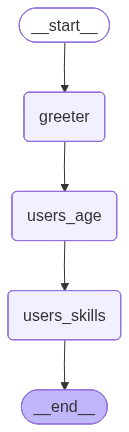

In [6]:
graph = StateGraph(AgentState)

graph.add_node('greeter', greet_user)
graph.add_node('users_age', users_age)
graph.add_node('users_skills', users_skills)

graph.add_edge('greeter', 'users_age')
graph.add_edge('users_age', 'users_skills')

graph.set_entry_point('greeter')
graph.set_finish_point('users_skills')

app = graph.compile()
app

In [8]:
result = app.invoke({'name': "Linda", 'age': '29', 'skills': ['node', 'python', 'langgraph']})
result['result']

'Linda, welcome to the System. You are 29 years old! Your skills are: node, python, langgraph'